# 0. IMPORTS AND FUNCTIONS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import gridspec
from datetime import datetime
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
def aggregation(data, column1, column2, column3=''):

    '''
    Definition: Receives up to three columns and can group until up to the last two
    
    data: Dataframe where the data is 
    column1: Column that will be aggregated (mean, median, max, min, etc)
    **args: Column(s) that will group the data
    
    Returns: Grouped object
    '''
    if column3 == '':
        grouped_obj = data[[column1, column2]].groupby(column2)
        
    elif column3 != '':
         grouped_obj = data[[column1, column2, column3]].groupby([column2, column3])
            
    return grouped_obj

# 1. READING FILES

In [5]:
# Importing csv file
df_raw = pd.read_csv(r'C:\Users\andre\repos\python-zero-ao-ds\datasets\kc_house_data.csv')
df_raw.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000 221900.00         3       1.00         1180   
1  6414100192  20141209T000000 538000.00         3       2.25         2570   
2  5631500400  20150225T000000 180000.00         2       1.00          770   
3  2487200875  20141209T000000 604000.00         4       3.00         1960   
4  1954400510  20150218T000000 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650    1.00           0     0  ...      7        1180              0   
1      7242    2.00           0     0  ...      7        2170            400   
2     10000    1.00           0     0  ...      6         770              0   
3      5000    1.00           0     0  ...      7        1050            910   
4      8080    1.00           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.51 -122.26           1340        5650  
1      1951          1991    98125 47.72 -122.32           1690        7639  
2      1933             0    98028 47.74 -122.23           2720        8062  
3      1965             0    98136 47.52 -122.39           1360        5000  
4      1987             0    98074 47.62 -122.05           1800        7503  

[5 rows x 21 columns]

In [6]:
df_raw.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# How groupby works

df_raw_grouped = df_raw[['id', 'yr_built']].groupby('yr_built')

for yr_built, dataframe in df_raw_grouped:
    print('Ano de construção: {}'.format(yr_built))
    print('Imóveis {}'.format(len(dataframe)))

Ano de construção: 1900
Imóveis 87
Ano de construção: 1901
Imóveis 29
Ano de construção: 1902
Imóveis 27
Ano de construção: 1903
Imóveis 46
Ano de construção: 1904
Imóveis 45
Ano de construção: 1905
Imóveis 74
Ano de construção: 1906
Imóveis 92
Ano de construção: 1907
Imóveis 65
Ano de construção: 1908
Imóveis 86
Ano de construção: 1909
Imóveis 94
Ano de construção: 1910
Imóveis 134
Ano de construção: 1911
Imóveis 73
Ano de construção: 1912
Imóveis 79
Ano de construção: 1913
Imóveis 59
Ano de construção: 1914
Imóveis 54
Ano de construção: 1915
Imóveis 64
Ano de construção: 1916
Imóveis 79
Ano de construção: 1917
Imóveis 56
Ano de construção: 1918
Imóveis 120
Ano de construção: 1919
Imóveis 88
Ano de construção: 1920
Imóveis 98
Ano de construção: 1921
Imóveis 76
Ano de construção: 1922
Imóveis 95
Ano de construção: 1923
Imóveis 84
Ano de construção: 1924
Imóveis 139
Ano de construção: 1925
Imóveis 165
Ano de construção: 1926
Imóveis 180
Ano de construção: 1927
Imóveis 115
Ano de constru

# 2. ANSERING CEO's QUESTIONS

### 1. Qual o número de imóveis por ano de construção?

In [8]:
df1 = df_raw.copy()

aggregation(df1, 'id', 'yr_built').count().reset_index()

yr_built   id
0        1900   87
1        1901   29
2        1902   27
3        1903   46
4        1904   45
..        ...  ...
111      2011  130
112      2012  170
113      2013  201
114      2014  559
115      2015   38

[116 rows x 2 columns]

### 2. Qual o menor número de quartos por ano de construção dos imóveis?

In [9]:
aggregation(df1, 'bedrooms', 'yr_built').min().reset_index()

yr_built  bedrooms
0        1900         1
1        1901         2
2        1902         2
3        1903         1
4        1904         2
..        ...       ...
111      2011         1
112      2012         2
113      2013         2
114      2014         1
115      2015         1

[116 rows x 2 columns]

### 3. Qual o preço de compra mais alto por cada número de quarto?


In [10]:
aggregation(df1, 'price', 'bedrooms').max().reset_index()

bedrooms      price
0          0 1295650.00
1          1 1247000.00
2          2 3278000.00
3          3 3800000.00
4          4 4489000.00
5          5 7062500.00
6          6 7700000.00
7          7 3200000.00
8          8 3300000.00
9          9 1400000.00
10        10 1148000.00
11        11  520000.00
12        33  640000.00

### 4. Qual a soma de todos os preços de compra por número de quartos?

In [11]:
aggregation(df1, 'price', 'bedrooms').sum().reset_index()

bedrooms         price
0          0    5323550.00
1          1   63210934.00
2          2 1107788602.00
3          3 4580263939.00
4          4 4372957028.00
5          5 1259346326.00
6          6  224541613.00
7          7   36145017.00
8          8   14366000.00
9          9    5363999.00
10        10    2458000.00
11        11     520000.00
12        33     640000.00

### 5. Qual a soma de todos os preços  de compra por número de quartos e banheiros?


In [12]:
aggregation(df1, 'price', 'bedrooms', 'bathrooms').sum()

price
bedrooms bathrooms           
0        0.00      3642600.00
         0.75       265000.00
         1.00       228000.00
         1.50       288000.00
         2.50       899950.00
...                       ...
10       2.00       650000.00
         3.00       660000.00
         5.25      1148000.00
11       3.00       520000.00
33       1.75       640000.00

[144 rows x 1 columns]

### 6. Qual o tamanho médio das salas dos imóveis por ano de construção?

In [13]:
aggregation(df1, 'sqft_living15', 'yr_built').mean().reset_index()

yr_built  sqft_living15
0        1900        1667.11
1        1901        1530.97
2        1902        1913.70
3        1903        1537.61
4        1904        1630.22
..        ...            ...
111      2011        2226.72
112      2012        2246.66
113      2013        2340.72
114      2014        2282.05
115      2015        2026.05

[116 rows x 2 columns]

### 7. Qual o tamanho mediano das salas dos imóveis por ano de construção?

In [14]:
aggregation(df1, 'sqft_living15', 'yr_built').median()

sqft_living15
yr_built               
1900            1590.00
1901            1420.00
1902            1720.00
1903            1480.00
1904            1540.00
...                 ...
2011            2210.00
2012            2140.00
2013            2303.00
2014            2120.00
2015            1680.00

[116 rows x 1 columns]

### 8. Qual o desvio padrão do tamanho das salas dos imóveis por ano de construção?

In [15]:
aggregation(df1, 'sqft_living15', 'yr_built').std().reset_index()

yr_built  sqft_living15
0        1900         429.14
1        1901         355.91
2        1902         656.55
3        1903         414.52
4        1904         490.87
..        ...            ...
111      2011         683.58
112      2012         649.91
113      2013         741.18
114      2014         809.92
115      2015         838.15

[116 rows x 2 columns]

### 9. Como é  o crescimento médio de preços de compras dos imóveis por ano, por dia, pela semana do ano?

In [18]:
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')

df1['date_year'] = pd.DatetimeIndex(df1['date']).year
df1['date_month'] = pd.to_datetime(df1['date']).dt.strftime('%Y-%U')

df1

id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13 221900.00         3       1.00         1180   
1      6414100192 2014-12-09 538000.00         3       2.25         2570   
2      5631500400 2015-02-25 180000.00         2       1.00          770   
3      2487200875 2014-12-09 604000.00         4       3.00         1960   
4      1954400510 2015-02-18 510000.00         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21 360000.00         3       2.50         1530   
21609  6600060120 2015-02-23 400000.00         4       2.50         2310   
21610  1523300141 2014-06-23 402101.00         2       0.75         1020   
21611   291310100 2015-01-16 400000.00         3       2.50         1600   
21612  1523300157 2014-10-15 325000.00         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
0          5650    1.00           0     0  ...              0      1955   
1          7242    2.00           0     0  ...            400      1951   
2         10000    1.00           0     0  ...              0      1933   
3          5000    1.00           0     0  ...            910      1965   
4          8080    1.00           0     0  ...              0      1987   
...         ...     ...         ...   ...  ...            ...       ...   
21608      1131    3.00           0     0  ...              0      2009   
21609      5813    2.00           0     0  ...              0      2014   
21610      1350    2.00           0     0  ...              0      2009   
21611      2388    2.00           0     0  ...              0      2004   
21612      1076    2.00           0     0  ...              0      2008   

       yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  \
0                 0    98178 47.51 -122.26           1340        5650   
1              1991    98125 47.72 -122.32           1690        7639   
2                 0    98028 47.74 -122.23           2720        8062   
3                 0    98136 47.52 -122.39           1360        5000   
4                 0    98074 47.62 -122.05           1800        7503   
...             ...      ...   ...     ...            ...         ...   
21608             0    98103 47.70 -122.35           1530        1509   
21609             0    98146 47.51 -122.36           1830        7200   
21610             0    98144 47.59 -122.30           1020        2007   
21611             0    98027 47.53 -122.07           1410        1287   
21612             0    98144 47.59 -122.30           1020        1357   

       date_year  date_month  
0           2014     2014-41  
1           2014     2014-49  
2           2015     2015-08  
3           2014     2014-49  
4           2015     2015-07  
...          ...         ...  
21608       2014     2014-20  
21609       2015     2015-08  
21610       2014     2014-25  
21611       2015     2015-02  
21612       2014     2014-41  

[21613 rows x 23 columns]

C:\Users\andre\AppData\Local\Temp/ipykernel_7692/3022770914.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=agg3['date'], rotation=45)


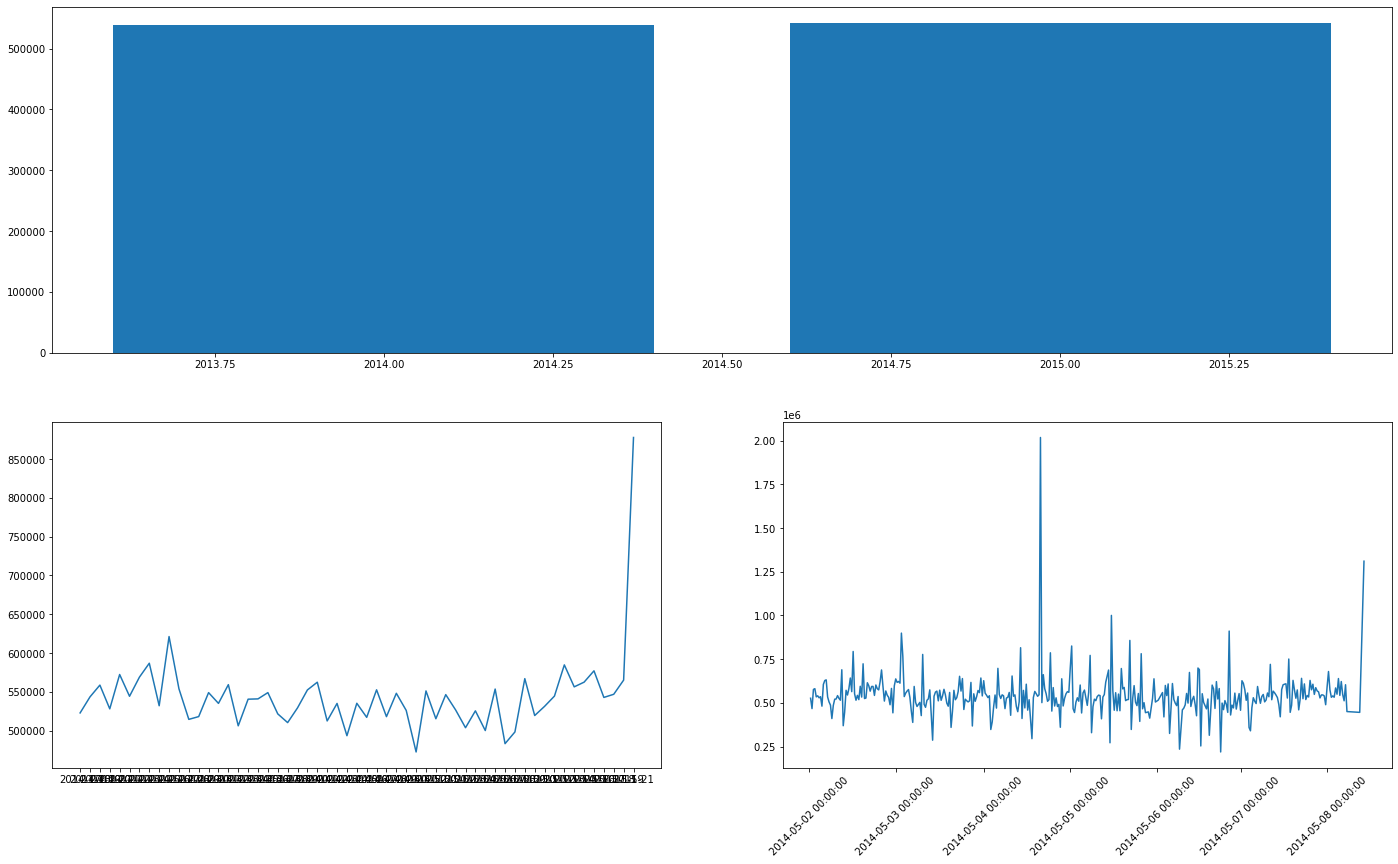

In [30]:
### Dashboard ###

# Sets the size of the whole figure
fig = plt.figure(figsize=(24, 14))

# With gridspec, I'm defining the number of rows and cols
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0, :]) # first row
ax2 = fig.add_subplot(specs[1, 0]) # second row - first column
ax3 = fig.add_subplot(specs[1, 1]) # second row - second column

# First plot
agg1 = aggregation(df1, 'price', 'date_year').mean().reset_index()
ax1.bar(agg1['date_year'], agg1['price'])

# Second plot
agg2 = aggregation(df1, 'price', 'date_month').mean().reset_index()
ax2.plot(agg2['date_month'], agg2['price'])

# Third plot
agg3 = aggregation(df1, 'price', 'date').mean().reset_index()
ax3.plot(agg3['date'], agg3['price'])
ax3.set_xticklabels(labels=agg3['date'], rotation=45)

plt.show()

### 10. Gostaria de olhar no mapa e conseguir distinguir as casas com maior preço.

In [34]:
houses = df1[['id', 'price', 'lat', 'long']]

figure = px.scatter_mapbox(houses,
                           lat='lat',
                           lon='long', 
                           size='price',
                           color_continuous_scale=px.colors.cyclical.IceFire,
                           size_max=15,
                           zoom=10)

figure.update_layout(mapbox_style='open-street-map')
figure.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0}, height=800)


figure.show()

# 3. NEW CEO's QUESTIONS

### 1. Crie uma nova coluna chamada:“dormitory_type”
- Se o valor da coluna “bedrooms” for igual a 1 => ‘studio’
- Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
- Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

In [36]:
df2 = df_raw.copy()

df2['dormitory_type'] = df2['bedrooms'].apply(lambda x: 'studio' if x == 1 else
                                                          'apartment' if x == 2 else 'house')

df2[['bedrooms', 'dormitory_type']].head()

bedrooms dormitory_type
0         3          house
1         3          house
2         2      apartment
3         4          house
4         3          house

### 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

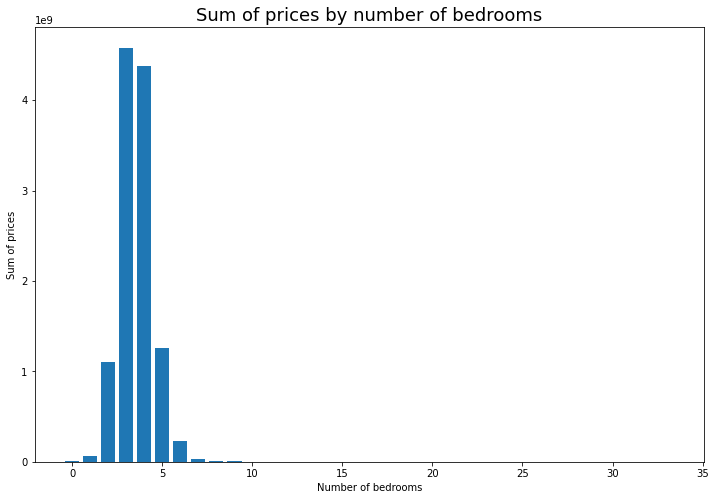

In [40]:
sum_of_prices = aggregation(df2, 'price', 'bedrooms').sum().reset_index()

plt.figure(figsize=(12, 8))

plt.bar(sum_of_prices['bedrooms'], sum_of_prices['price'])
plt.title('Sum of prices by number of bedrooms', fontsize=18)
plt.xlabel('Number of bedrooms')
plt.ylabel('Sum of prices')

plt.show()

### 3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

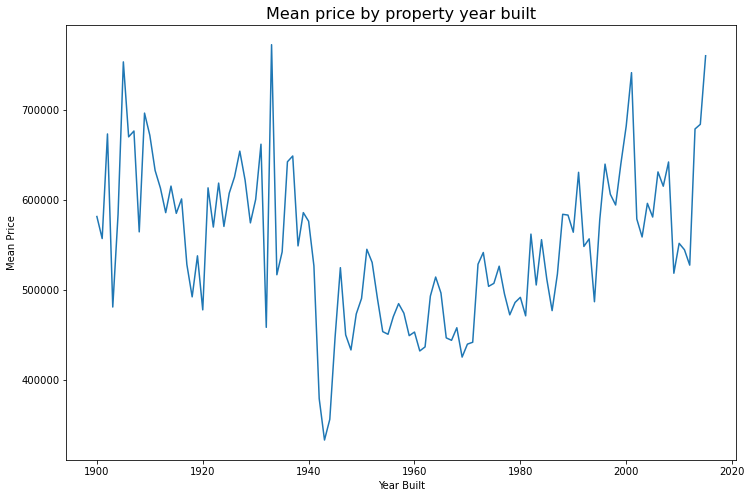

In [41]:
mean_price = aggregation(df2, 'price', 'yr_built').mean().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(mean_price['yr_built'], mean_price['price'])
plt.title('Mean price by property year built', fontsize=16)
plt.xlabel('Year Built')
plt.ylabel('Mean Price')
plt.show()

### 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios

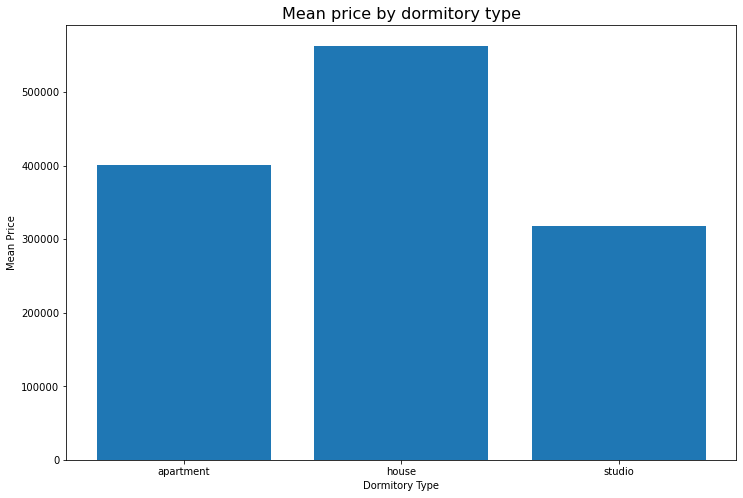

In [42]:
mean_price = aggregation(df2, 'price', 'dormitory_type').mean().reset_index()

plt.figure(figsize=(12, 8))

plt.bar(mean_price['dormitory_type'], mean_price['price'])
plt.title('Mean price by dormitory type', fontsize=16)
plt.xlabel('Dormitory Type')
plt.ylabel('Mean Price')

plt.show()

### 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

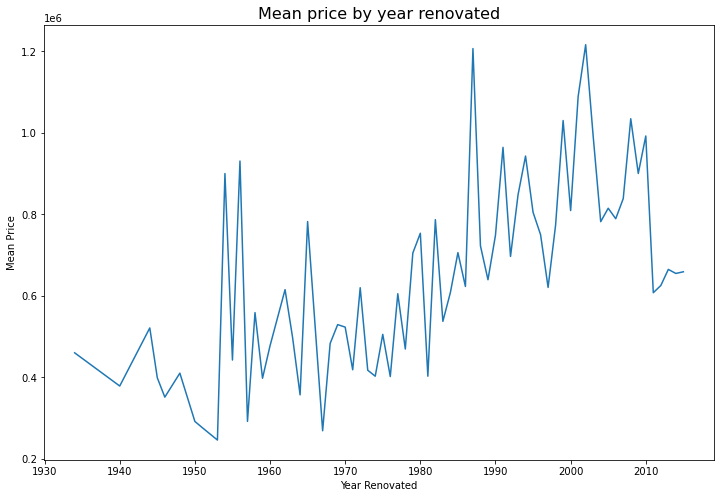

In [48]:
mean_price = df2[df2['yr_renovated'] >= 1930][['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(mean_price['yr_renovated'], mean_price['price'])
plt.title('Mean price by year renovated', fontsize=16)
plt.xlabel('Year Renovated')
plt.ylabel('Mean Price')
plt.show()

### 6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [51]:
df2[['price', 'yr_built', 'dormitory_type']].groupby(['yr_built', 'dormitory_type']).mean().reset_index()

yr_built dormitory_type     price
0        1900      apartment 589533.33
1        1900          house 584854.27
2        1900         studio 398944.00
3        1901      apartment 452856.40
4        1901          house 578619.17
..        ...            ...       ...
300      2014          house 692687.72
301      2014         studio 516500.00
302      2015      apartment 543250.00
303      2015          house 797383.06
304      2015         studio 385195.00

[305 rows x 3 columns]

### 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 (Dashboard: 1 Linha e 2 colunas)

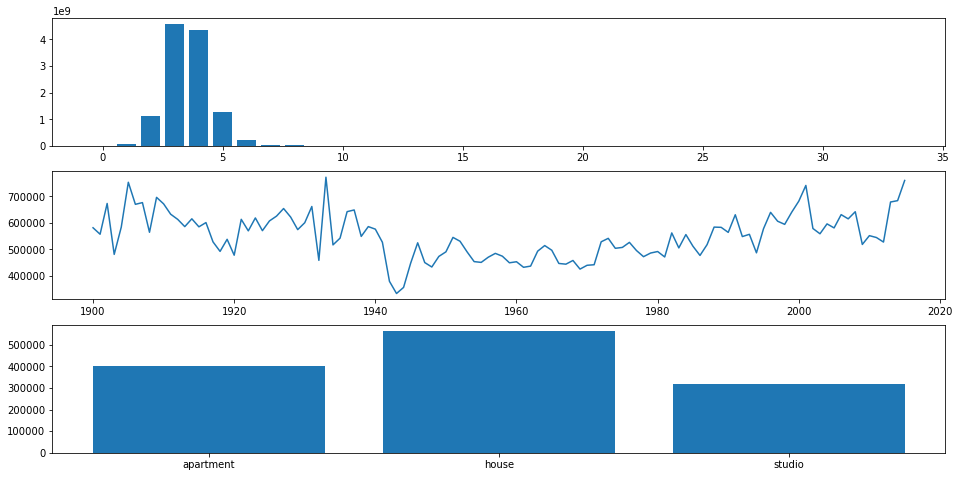

In [65]:
fig = plt.figure(figsize=(16, 8))

specs = gridspec.GridSpec(nrows=3, ncols=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[1, 0])
ax3 = fig.add_subplot(specs[2, 0])

# First graph
first = aggregation(df2, 'price', 'bedrooms').sum().reset_index()
ax1.bar(first['bedrooms'], first['price'])

# Second graph
second = aggregation(df2, 'price', 'yr_built').mean().reset_index()
ax2.plot(second['yr_built'], second['price'])

# Third graph
third = aggregation(df2, 'price', 'dormitory_type').mean().reset_index()
ax3.bar(third['dormitory_type'], third['price'])

plt.show()

### 8. Crie um Dashboard com os gráficos das perguntas 02, 04 (Dashboard: 2 colunas)

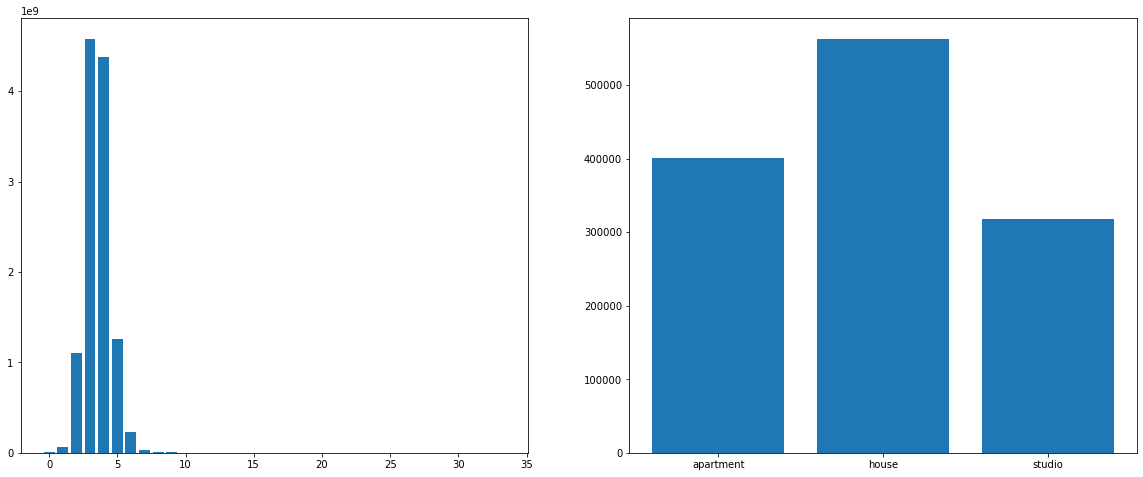

In [74]:
fig = plt.figure(figsize=(20, 8))

specs = gridspec.GridSpec(nrows=1, ncols=2, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[0, 1])

# first graph
first = aggregation(df2, 'price', 'bedrooms').sum().reset_index()
ax1.bar(first['bedrooms'], first['price'])

# second grapth
second = aggregation(df2, 'price', 'dormitory_type').mean().reset_index()
ax2.bar(second['dormitory_type'], second['price'])

plt.show()

### 9. Crie um Dashboard com os gráficos das perguntas 03, 05 (Dashboard: 2 Linhas)

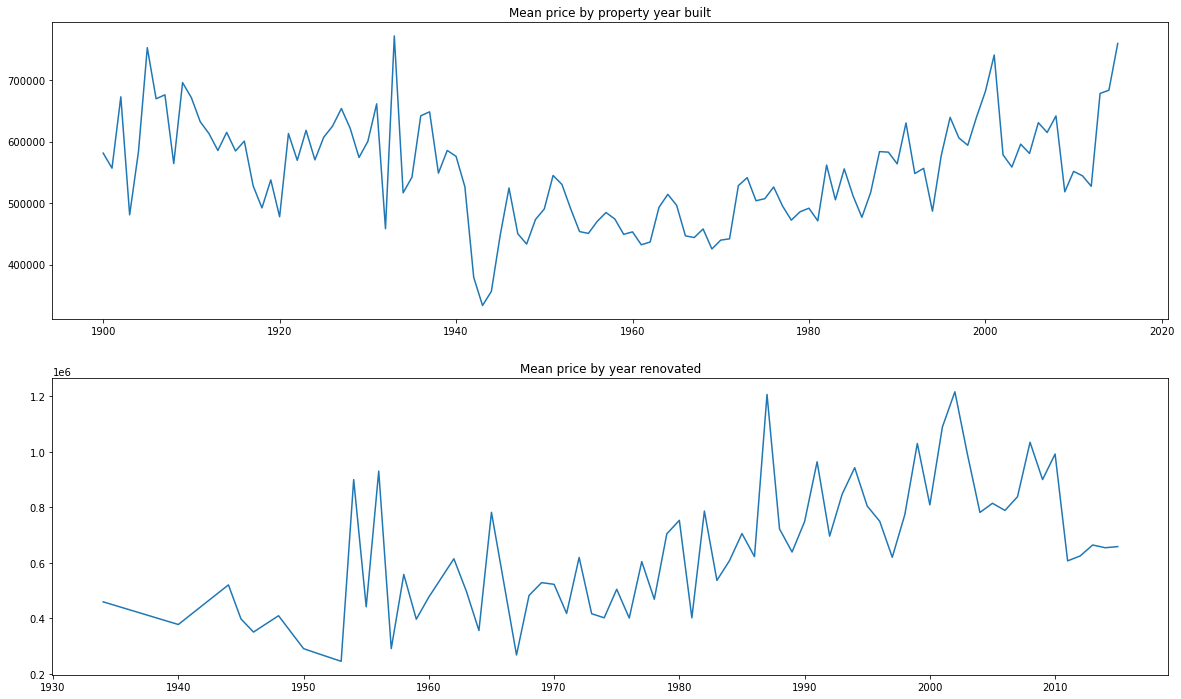

In [78]:
fig = plt.figure(figsize=(20, 12))

specs = gridspec.GridSpec(nrows=2, ncols=1, figure=fig)

ax1 = fig.add_subplot(specs[0, 0])
ax2 = fig.add_subplot(specs[1, 0])

# first graph
first = aggregation(df2, 'price', 'yr_built').mean().reset_index()
ax1.plot(first['yr_built'], first['price'])
ax1.title.set_text('Mean price by property year built')

# second graph
second = df2[df2['yr_renovated'] >= 1930][['price', 'yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot(second['yr_renovated'], second['price'])
ax2.title.set_text('Mean price by year renovated')

plt.show()

### 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar

In [85]:
df_living = df2[['id', 'sqft_living15', 'lat', 'long']]

figure = px.scatter_mapbox(df_living,
                           lat='lat',  
                           lon='long',
                           size='sqft_living15',
                           hover_name='id',
                           color_continuous_scale=px.colors.cyclical.IceFire,
                           zoom=12)

figure.update_layout(mapbox_style='open-street-map')
figure.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0}, height=700)

figure.show()